<a href="https://colab.research.google.com/github/synergit/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/dev/perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

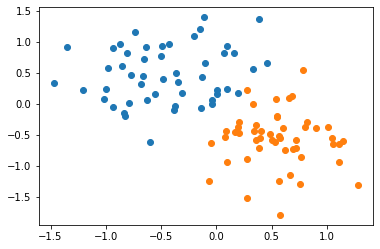

In [ ]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1]) # X is the point with 2 dimensions, 0 and 1, with y==0, means the first blob
  plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [ ]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


(0.1622033268213272, -0.1682732254266739, 0.1939089596271515)


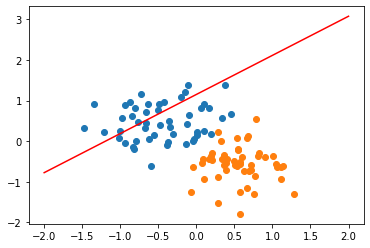

In [ ]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  # [w, b] = model.parameters()
  w1, w2 = w.view(2)
  b1 = b[0]
  return(w1.item(), w2.item(), b1.item())

print(get_params())

def plot_fit(title):
  plt.title = title
  # 0 = w1x1+ w1x2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  scatter_plot()
  plt.plot(x1, x2, 'r')

plot_fit("try")

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  # print(f'epoch: {i}, loss: {loss.item()}')
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Text(0, 0.5, 'epoch')

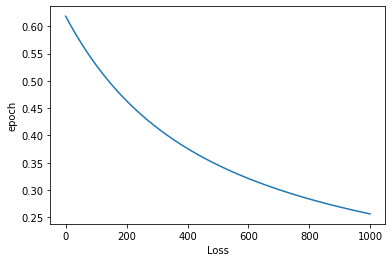

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.ylabel('epoch')

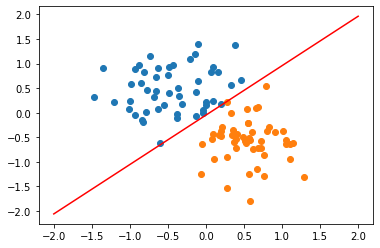

In [ ]:
plot_fit('trained data')

Green point positive probability=0.9424158334732056
Black point negative probability=0.05055497586727142
Green point in class=1
Black point in class=0


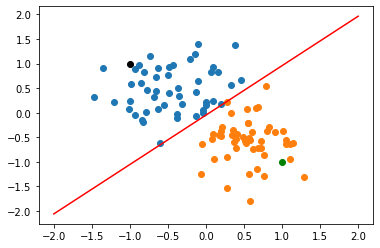

In [ ]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'go')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print(f"Green point positive probability={model.forward(point1).item()}")
print(f"Black point negative probability={model.forward(point2).item()}")
print(f"Green point in class={model.predict(point1)}")
print(f"Black point in class={model.predict(point2)}")
plot_fit('trained data')